In [419]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [420]:
#C:\Users\a\Documents\PROJECTS----\DT - Project\Doctor_fee_consultation (2)\Final Participant Data Folder

In [421]:
train_data=pd.read_excel(r"C:\Users\a\Documents\PROJECTS----\DT - Project\Doctor_fee_consultation (2)\Final Participant Data Folder\Final_Train.xlsx")

In [422]:
test_data=pd.read_excel(r"C:\Users\a\Documents\PROJECTS----\DT - Project\Doctor_fee_consultation (2)\Final Participant Data Folder\Final_Test.xlsx")

In [423]:
train_data.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [424]:
test_data.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [425]:
train_data.shape

(5961, 7)

In [426]:
test_data.shape

(1987, 6)

In [427]:
train_data.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [ ]:
Null values in Rating,Place and Misselenous_Info

In [428]:
test_data.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

In [429]:
#unique value in train data
print('Qualification:', train_data['Qualification'].nunique())
print('Experience:', train_data['Experience'].nunique())
print('Rating:', train_data['Rating'].nunique())
print('Place:', train_data['Place'].nunique())
print('Profile', train_data['Profile'].nunique())

Qualification: 1420
Experience: 64
Rating: 51
Place: 877
Profile 6


In [430]:
#unique value in test data
print('Qualification:', test_data['Qualification'].nunique())
print('Experience:', test_data['Experience'].nunique())
print('Rating:', test_data['Rating'].nunique())
print('Place:', test_data['Place'].nunique())
print('Profile', test_data['Profile'].nunique())

Qualification: 630
Experience: 57
Rating: 36
Place: 592
Profile 6


In [431]:
#to remove unwanted text from experience column
train_data['experience_years']=train_data['Experience'].str.split('years').str.get(0)


In [432]:
train_data.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,experience_years
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,24
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,12
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,9
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,12
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,20


In [433]:
test_data['experience_years']=test_data['Experience'].str.split('years').str.get(0)

In [434]:
test_data.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,experience_years
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN,35
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN,31
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai",40
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN,0
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...,16


In [435]:
#replacing null values with 'missing' in place column
train_data['Place'].fillna('missing', inplace=True)

In [436]:
test_data['Place'].fillna('missing', inplace=True)

In [437]:
#removing % symbol from rating
train_data['Rating'] = train_data['Rating'].str.replace(r'\D', '')

In [438]:
print('Rating:', train_data['Rating'].nunique())

Rating: 51


In [440]:
train_data['Rating'].isnull().sum()

3302

In [441]:
#replacing null values with '0'
train_data['Rating'].fillna('0', inplace=True)

In [442]:
train_data['Rating'].isnull().sum()

0

In [443]:
train_data['Rating'].value_counts()

0      3302
100     684
98      290
99      259
97      241
96      220
95      178
94      115
93      109
90       66
92       66
91       60
89       42
88       41
85       27
82       23
86       21
83       21
80       19
77       16
87       14
84       13
79       13
67       12
81       12
71        9
76        9
75        8
73        8
74        7
60        7
78        6
68        5
56        5
69        4
70        4
72        3
57        3
33        2
63        2
62        2
64        2
55        2
58        1
53        1
40        1
45        1
7         1
47        1
48        1
65        1
36        1
Name: Rating, dtype: int64

In [444]:
test_data['Rating'] = test_data['Rating'].str.replace(r'\D', '')

In [445]:

print('Rating:', test_data['Rating'].nunique())

Rating: 36


In [447]:

test_data['Rating'].isnull().sum()

1090

In [448]:

test_data['Rating'].fillna('0', inplace=True)

In [449]:

test_data['Rating'].isnull().sum()

0

In [450]:
test_data['Rating'].value_counts()

0      1090
100     223
98      112
97       84
99       68
96       65
94       51
95       47
93       34
90       29
92       29
91       26
88       13
83       11
87       11
89       11
82        9
85        8
84        7
71        7
80        7
86        6
67        5
73        5
70        4
76        4
60        4
55        3
81        3
69        2
79        2
64        2
65        1
77        1
53        1
78        1
52        1
Name: Rating, dtype: int64

In [451]:
train_data.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,experience_years
0,"BHMS, MD - Homeopathy",24 years experience,100,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,24
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,12
2,"MBBS, MS - Otorhinolaryngology",9 years experience,0,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,9
3,"BSc - Zoology, BAMS",12 years experience,0,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,12
4,BAMS,20 years experience,100,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,20


In [452]:
train_data.drop(['Experience','Miscellaneous_Info'], axis=1,inplace=True)

In [453]:
train_data.head()

,Qualification,Rating,Place,Profile,Fees,experience_years
0,"BHMS, MD - Homeopathy",100,"Kakkanad, Ernakulam",Homeopath,100,24
1,"BAMS, MD - Ayurveda Medicine",98,"Whitefield, Bangalore",Ayurveda,350,12
2,"MBBS, MS - Otorhinolaryngology",0,"Mathikere - BEL, Bangalore",ENT Specialist,300,9
3,"BSc - Zoology, BAMS",0,"Bannerghatta Road, Bangalore",Ayurveda,250,12
4,BAMS,100,"Keelkattalai, Chennai",Ayurveda,250,20


In [454]:
#dropping unnecessary column
test_data.drop(['Experience','Miscellaneous_Info'], axis=1,inplace=True)

In [455]:
test_data.head(10)

,Qualification,Rating,Place,Profile,experience_years
0,MBBS,0,"Ghatkopar East, Mumbai",General Medicine,35
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",0,"West Marredpally, Hyderabad",ENT Specialist,31
2,"MBBS, DDVL",70,"KK Nagar, Chennai",Dermatologists,40
3,BAMS,0,"New Ashok Nagar, Delhi",Ayurveda,0
4,"BDS, MDS - Conservative Dentistry & Endodontics",100,"Kanakpura Road, Bangalore",Dentist,16
5,"BDS, MDS",90,"Velachery, Chennai",Dentist,14
6,"MBBS, Diploma in Otorhinolaryngology (DLO)",94,"Frazer Town, Bangalore",ENT Specialist,23
7,"BDS, MDS - Pedodontics",94,"Attapur, Hyderabad",Dentist,9
8,"MD - Ayurveda Medicine, BAMS, Yoga Teachers Tr...",99,"Banashankari, Bangalore",Ayurveda,11
9,BHMS,0,"Mayur Vihar Ph-I, Delhi",Homeopath,44


In [456]:
test_data.dtypes

Qualification       object
Rating              object
Place               object
Profile             object
experience_years    object
dtype: object

In [457]:
train_data['Rating']=train_data['Rating'].astype(int)
train_data['experience_years']=train_data['experience_years'].astype(int)
test_data['Rating']=test_data['Rating'].astype(int)
test_data['experience_years']=test_data['experience_years'].astype(int)

In [458]:
train_data.dtypes

Qualification       object
Rating               int32
Place               object
Profile             object
Fees                 int64
experience_years     int32
dtype: object

In [459]:
#cleaning 'place' by removing details of address
test_data['Place']=test_data['Place'].str.split(',').str.get(-1)

In [460]:
train_data['Place']=train_data['Place'].str.split(',').str.get(-1)

In [461]:
train_data['Place'].head()

0     Ernakulam
1     Bangalore
2     Bangalore
3     Bangalore
4       Chennai
Name: Place, dtype: object

In [462]:
train_data['Place'].value_counts()

 Bangalore             1258
 Mumbai                1219
 Delhi                 1185
 Hyderabad              951
 Chennai                855
 Coimbatore             228
 Ernakulam              153
 Thiruvananthapuram      86
missing                  25
e                         1
Name: Place, dtype: int64

In [463]:
#cleaning "qualification"
train_data['Qualification']=train_data['Qualification'].str.split(",").str.slice(0,2).str.join(",")

In [464]:
test_data['Qualification']=test_data['Qualification'].str.split(",").str.slice(0,2).str.join(",")

In [465]:
train_data['Qualification'].nunique()

734

In [ ]:
#Univariate analysis

<AxesSubplot:xlabel='experience_years', ylabel='Density'>

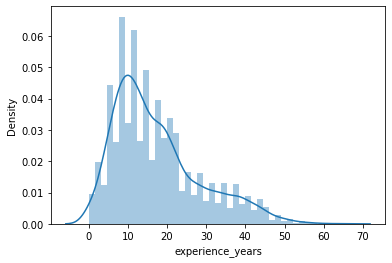

In [466]:
sb.distplot(train_data['experience_years'])

In [ ]:
The doctors in the dataset ranged from 0 to 50 yrs with majority doctors with 10-15 yrs of experience.

<AxesSubplot:xlabel='Fees', ylabel='Density'>

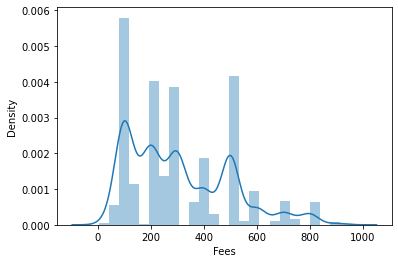

In [497]:
sb.distplot(train_data['Fees'])

In [ ]:
The fees ranged from 100-1000 Rs with max doc had fees  below 200.

<AxesSubplot:xlabel='Rating', ylabel='Density'>

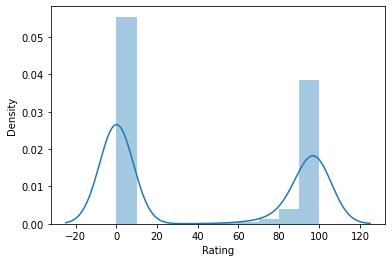

In [468]:
sb.distplot(train_data['Rating'])

In [469]:
#transforming categorical to numerical features
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list1=['Qualification', 'Place','Profile']
for val in list1:
    train_data[val]=le.fit_transform(train_data[val].astype(str))

In [470]:
le=LabelEncoder()
list1=['Qualification', 'Place','Profile']
for val in list1:
    test_data[val]=le.fit_transform(test_data[val].astype(str))

In [471]:
train_data.head(10)

,Qualification,Rating,Place,Profile,Fees,experience_years
0,239,100,4,5,100,24
1,55,98,0,0,350,12
2,549,0,0,3,300,9
3,278,0,0,0,250,12
4,7,100,1,0,250,20
5,7,0,1,0,100,8
6,196,0,3,5,200,42
7,95,99,0,1,200,10
8,508,0,5,4,100,14
9,279,0,4,1,100,23


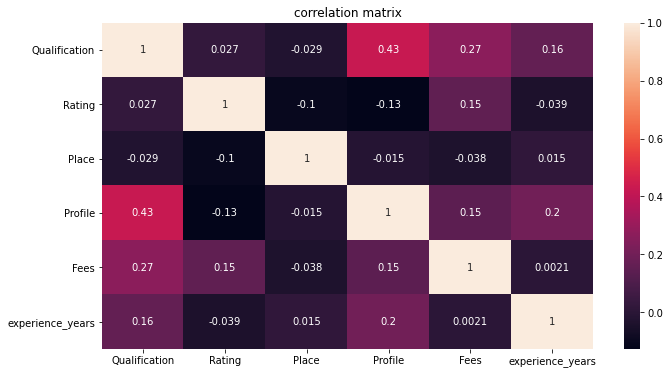

In [472]:
cor=train_data.corr()

plt.figure(figsize=(11,6))
sb.heatmap(cor,annot=True)
plt.title('correlation matrix')
plt.show()

In [473]:
#splitting the data
y=train_data['Fees']
x=train_data.drop('Fees', axis=1)



In [481]:
from sklearn.preprocessing import MinMaxScaler

scale=MinMaxScaler()
df_new=scale.fit_transform(x)

df_new=pd.DataFrame(df_new,columns=x.columns)

x=df_new

x.head()

,Qualification,Rating,Place,Profile,experience_years
0,0.326057,1.00,0.444444,1.0,0.363636
1,0.075034,0.98,0.000000,0.0,0.181818
2,0.748977,0.00,0.000000,0.6,0.136364
3,0.379263,0.00,0.000000,0.0,0.181818
4,0.009550,1.00,0.111111,0.0,0.303030


In [485]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [486]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [490]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
gbr.score(x_train,y_train)

0.25579670121050035

In [495]:

predgbr=gbr.predict(x_test)
print('mae_lnr',mean_absolute_error(y_test,predgbr))
print('mse_lnr',mean_squared_error(y_test,predgbr))
print('r2 score_gbr',r2_score(y_test,predgbr))

mae_lnr 128.175046255672
mse_lnr 26772.497971685996
r2 score_gbr 0.22277706366088457


In [478]:

rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr.score(x_train,y_train)

0.8024920408593986

In [479]:
predrfr=rfr.predict(x_test)
print('mae_rfr',mean_absolute_error(y_test,predrfr))
print('mse_rfr',mean_squared_error(y_test,predrfr))
print('r2 score_rfr',r2_score(y_test,predrfr))

mae_rfr 142.08529540796448
mse_rfr 33556.686462105085
r2 score_rfr 0.08068818895995677
